# Geometrical Methods in Machine Learning

## Homework 1

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Consider FIFA22 players statistics dataset ``hw1/data/FIFA22.csv``.

The dataset have the following feature groups (from left to right):
- ``Name`` to ``Club Logo`` - use them only for the visualization purposes,
- ``Value``, ``Wage`` - consider them for the interpretation task, remove from consideration for the regression task,
- ``Preferred Foot``, ``Best Position``, ``Body Type`` - categorical variables,
- ``Age`` to ``DefensiveAwareness`` - numerical variables.


Process dataset by:
- converting string values to numbers in the columns ``Value``, ``Wage``, ``Height``, ``Weight``,
- inputing `nan`'s if any,

### Task 1: PCA + interpretation (3 points)

Apply PCA analysis to data to find PCA estimate of data dimensionality given by the number of variables explaining 80% and 95% of the variance.

Draw and interpret biplots of the first two principal components and top 5 features with the highest influence (largest absolute eigenvalue coefficient) to each first two principal components. 

Comment whether PCA is applicable to categorical variables, as well as your preprocessing strategy for them.

In [ ]:
df = pd.read_csv('FIFA22.csv', delimiter=';')
df.dropna(how='any', inplace=True)

In [ ]:
df['Value'] = df['Value'].str.replace(r'\D', '')
df['Wage'] = df['Wage'].str.replace(r'\D', '')
df['Height'] = df['Height'].str.replace(r'\D', '')
df['Weight'] = df['Weight'].str.replace(r'\D', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df['Value'] = df['Value'].fillna(0)
df['Wage'] = df['Wage'].fillna(0)
df['Height'] = df['Height'].fillna(0)
df['Weight'] = df['Weight'].fillna(0)



In [ ]:
df['Value'] = df['Value'].astype(int)
df['Wage'] = df['Wage'].astype(int)
df['Height'] = df['Height'].astype(int)
df['Weight'] = df['Weight'].astype(int)

In [ ]:
X = df.drop(columns = ['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Best Position', 'Body Type'], axis=1)

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA()
pca.fit(X_std)

PCA()

In [ ]:
pc1, pc2 = 0, 1
eigenvector_x = pca.components_[pc1]
eigenvector_y = pca.components_[pc2]

In [ ]:
xs = pca.transform(X_std)[:,pc1]
ys = pca.transform(X_std)[:,pc2]


In [ ]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
targets = list(df['Name'])
features = list(X.columns)

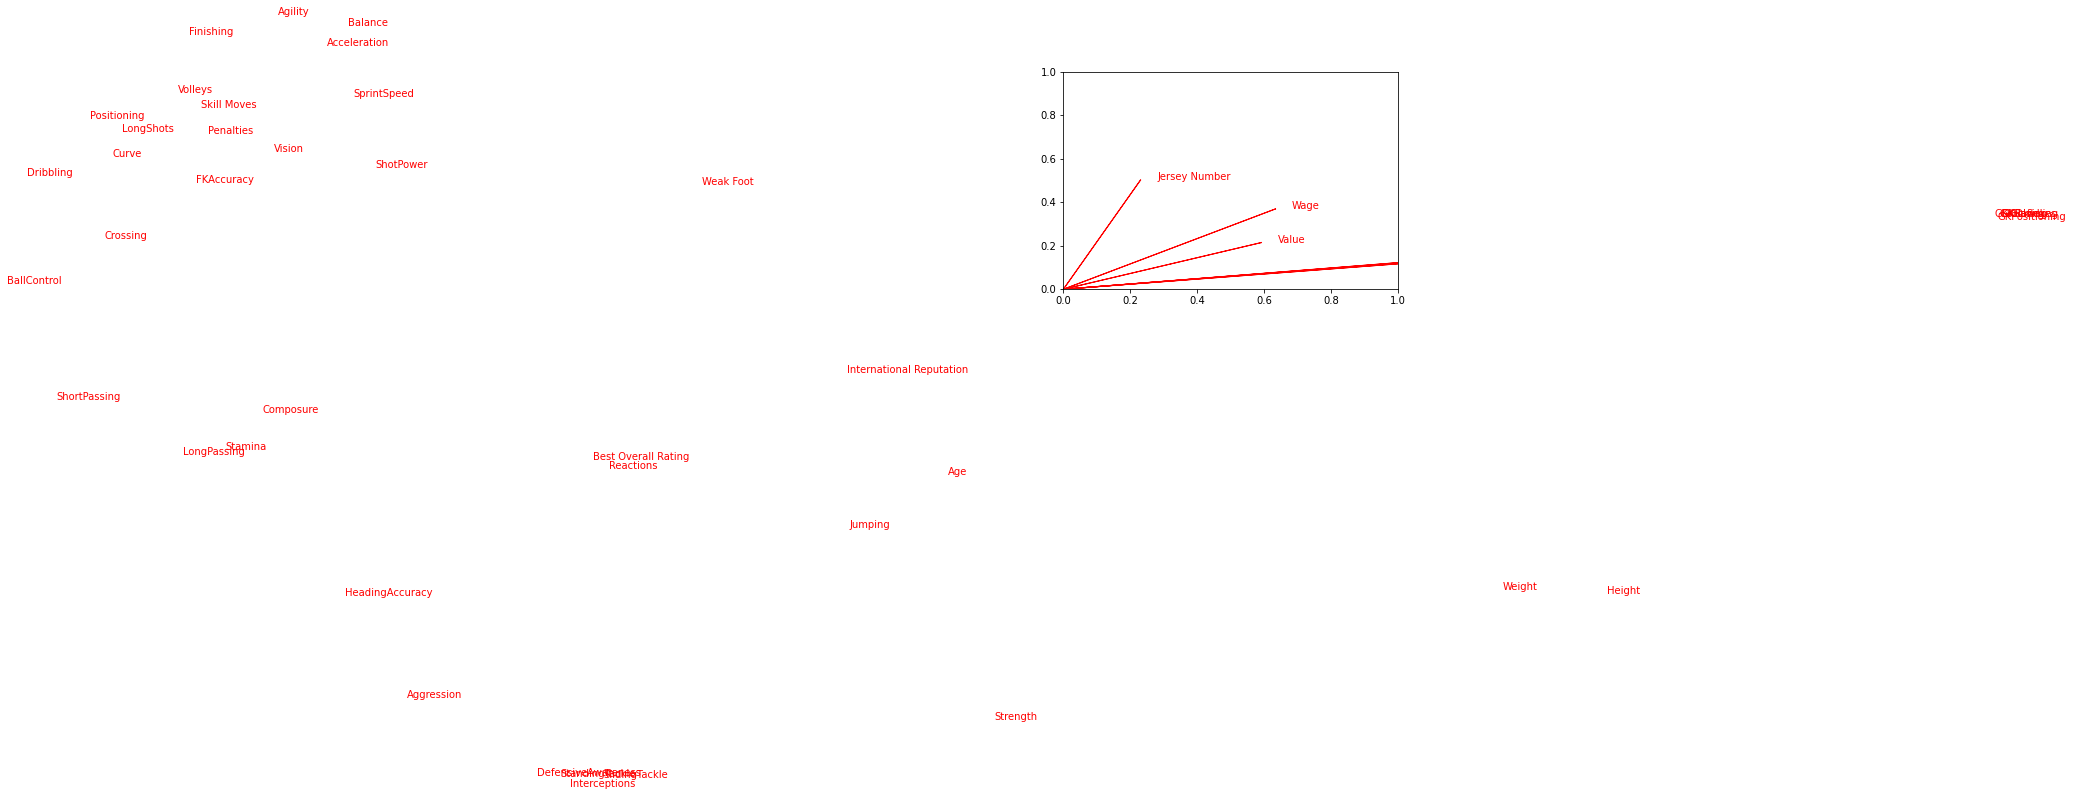

In [ ]:
for i in range(eigenvector_x.shape[0]):
    plt.arrow(0, 0, eigenvector_x[i] * max(xs), eigenvector_y[i] * max(ys), color='r', width=0.0005)
    plt.text(eigenvector_x[i] * max(xs) + 0.05, eigenvector_y[i] * max(ys), features[i], color='r')

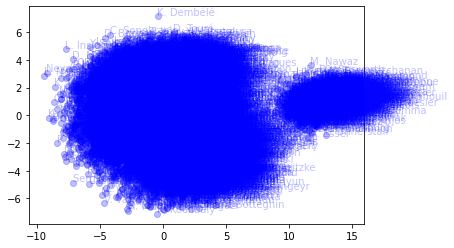

In [ ]:
for i in range(xs.shape[0]):
    plt.plot(xs[i], ys[i], 'bo', alpha=0.25)
    plt.text(xs[i] - 0.05, ys[i] + 0.1, targets[i], color='b', alpha=0.25)

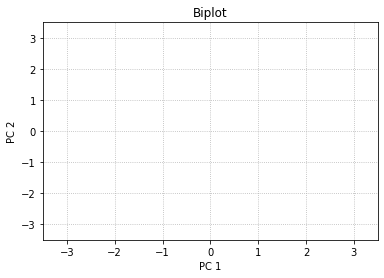

In [ ]:
plt.title("Biplot")
plt.xlabel("PC " + str(pc1 + 1))
plt.ylabel("PC " + str(pc2 + 1))
plt.xlim((-3.5, 3.5))
plt.ylim((-3.5, 3.5))
plt.grid(linestyle="dotted")
plt.show()

### Task 2: PCA + regression (2 points)

Consider the regression problem of predicting a target variable of _negotiation value_ of a player given by `Value` to `Wage` ratio. Apply a classifier of your choice on raw data and reduced data of various dimensions, based on raw player performance features (be sure to exclude ``Value`` and ``Wage`` features from consideration).

Perform a feature selection, selecting top 10 performing features, with any technique you know, compare them with top 10 features influencing first two principal components.

In [ ]:
y = df['Negotiation Value'] = df['Value']/df['Wage']

In [ ]:
X = df.drop(columns = ['Value', 'Wage', 'Negotiation Value', 'ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Best Position', 'Body Type'], axis=1)

In [ ]:
X_std = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=1, normalize=True)
r.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=1, normalize=True)

Top features by F-value:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=2)
selector.fit(X, y)
X_reduced = selector.transform(X)


In [ ]:
for i in range(len(selector.scores_)):
    print('Feature %d: %f' % (i, selector.scores_[i]))

Feature 0: 3.470259
Feature 1: 6.993826
Feature 2: 1.333900
Feature 3: 2.290841
Feature 4: 1.074968
Feature 5: 1.080779
Feature 6: 1.268098
Feature 7: 2.182465
Feature 8: 1.972022
Feature 9: 1.956434
Feature 10: 3.040957
Feature 11: 2.152761
Feature 12: 2.369928
Feature 13: 2.203001
Feature 14: 1.913937
Feature 15: 2.568773
Feature 16: 2.794419
Feature 17: 1.716774
Feature 18: 1.736380
Feature 19: 1.522632
Feature 20: 8.045180
Feature 21: 1.288111
Feature 22: 2.847161
Feature 23: 1.232675
Feature 24: 2.040419
Feature 25: 1.372529
Feature 26: 2.177706
Feature 27: 1.888308
Feature 28: 1.661355
Feature 29: 2.120042
Feature 30: 2.701044
Feature 31: 1.889674
Feature 32: 4.201556
Feature 33: 1.595941
Feature 34: 1.555055
Feature 35: 1.502830
Feature 36: 1.529421
Feature 37: 1.478641
Feature 38: 1.532798
Feature 39: 1.493252
Feature 40: 18.497185
Feature 41: 1.665499


In [ ]:
X.columns

Index(['Age', 'International Reputation', 'Weak Foot', 'Skill Moves',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating',
       'DefensiveAwareness'],
      dtype='object')

In [ ]:
print('Best Overall Rating, Reactions, International Reputation, Composure, Age, ShortPassing, ShotPower, BallControl, Vision, LongPassing')

Best Overall Rating, Reactions, International Reputation, Composure, Age, ShortPassing, ShotPower, BallControl, Vision, LongPassing


Top features by the PCA method:

In [ ]:
pca = PCA(random_state=42)
X_scaled = StandardScaler().fit_transform(X)
pca.fit(X_scaled)

PCA(random_state=42)

In [ ]:
comp1, comp2 = pca.components_[0], pca.components_[1]
args1 = np.argpartition(comp1, -10)[-10:]
args2 = np.argpartition(comp2, -10)[-10:]
top_pca = np.array([i for i, v in sorted(list(enumerate(comp1)) + list(enumerate(comp2)), key=lambda x: -x[1])[:10]])

In [ ]:
X.columns.values[np.sort(top_pca)]

array(['Finishing', 'Volleys', 'Acceleration', 'Agility', 'Balance',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes'], dtype=object)

The first  method seems more logical than the PCA method.

### Task 3: ICA signal separation and reconstruction (3 points)

Consider the EEG dataset ``hw1/data/EEG.npy`` consisting of brain electrical activity of dimension $d=10001$ measured over time via $m=64$ electrodes. In EEG every single electrode captures activity not only in the direct vicitity, but in the neighboring areas as well, so we can of think of every electode signal as a linear mixture of local and neighboring activity, thus suiting the ICA model:

$$\mathbf{X} = \mathbf{A}\mathbf{S}$$

where $\mathbf{S} \in \mathbb{R}^{n \times d}$ - $n$ source signals of dimension $d$, $\mathbf{X} \in \mathbb{R}^{m \times d}$ - $m$ observations of dimension $d$, $\mathbf{A}$ - $m \times n$ mixing matrix, where $m \geq n, \mathrm{Rank}(\mathbf{A}) = n$.

Along with the normal brain activity, the signal may contain various artifacts, like eye blinks, seen as rapid and high amplitude noise corrupting the signal.

The task is to separate the signal from noise, given by ICA components having blinks. Find $n=40$ sources using `FastICA` from sklearn. Handpick the sources contaning blinks and remove them while reconstucting the the signals back from sources, not having the blinks. You can additionally preprocess the data with `PCA` reducing the number of signals to $m_{PCA}=48$.

**Note:** the key for the reconstruction is the mixing matrix $\mathbf{A}$, it can be found via ``ica.mixing_``.

In [ ]:
X = np.load('EEG.npy')

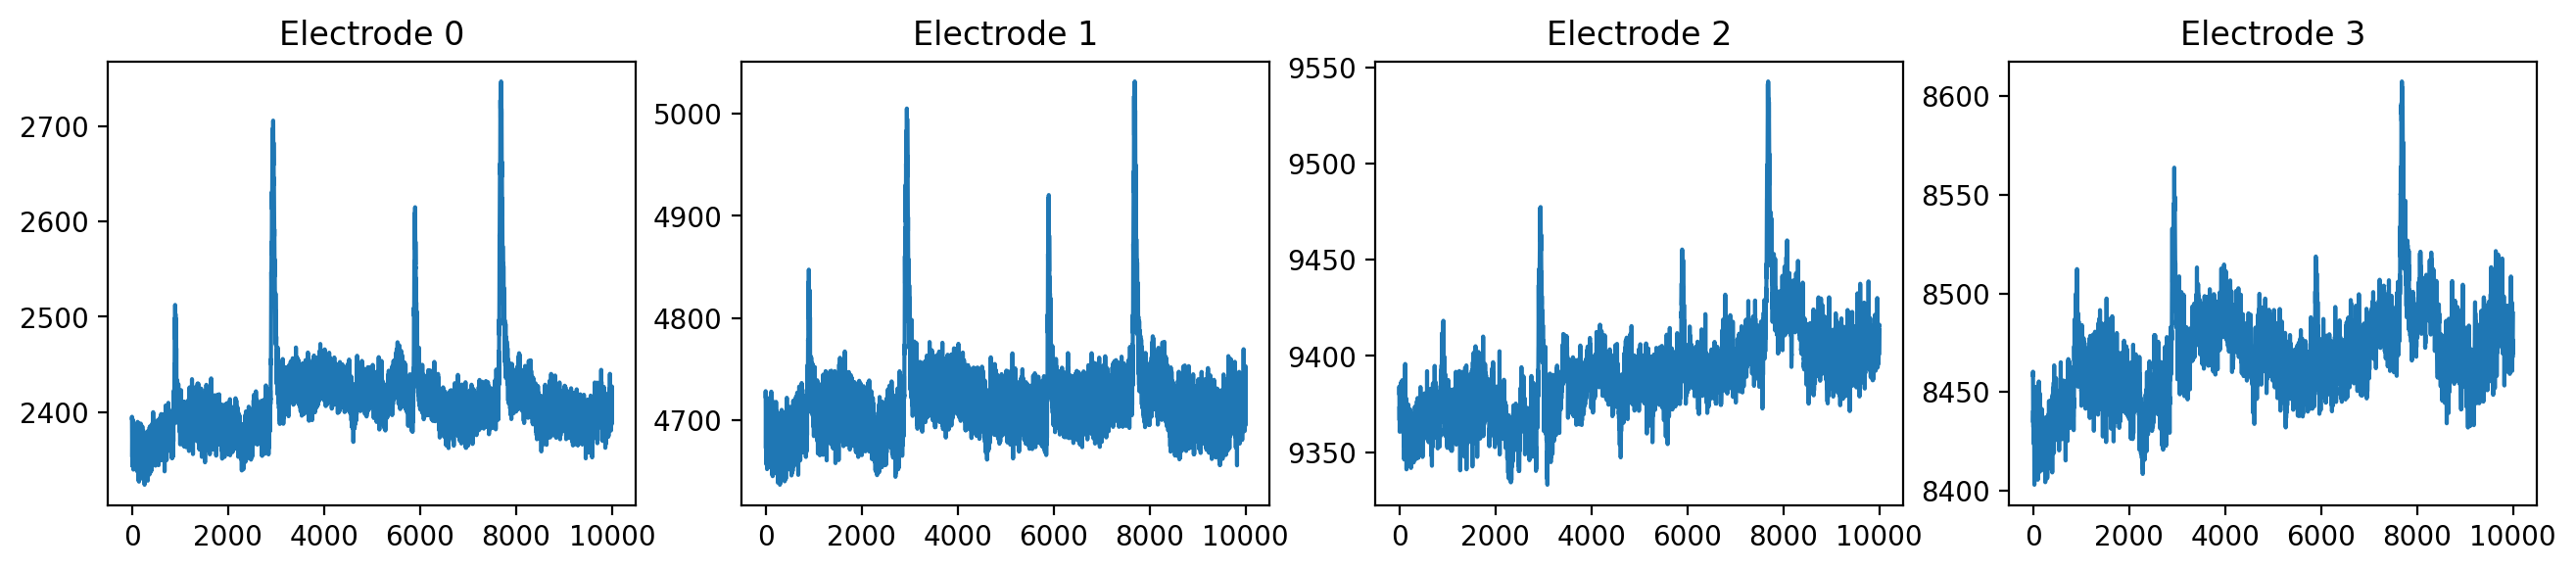

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
for j in range(4):
    ax[j].set_title("Electrode {}".format(j))
    ax[j].plot(X[:,j])
plt.show()

In [ ]:
pca = PCA(n_components=48).fit(X.T)
ica = FastICA(n_components=40).fit(X.T)
print("PCA components:\n", pca.components_)
print("\nICA components:\n", ica.mixing_)


PCA components:
 [[-0.01001883 -0.01001958 -0.01002029 ... -0.00999152 -0.00999193
  -0.00999206]
 [ 0.01624689  0.01869722  0.01336807 ...  0.00664768  0.00586367
  -0.00049073]
 [ 0.00948295  0.0086082   0.01023381 ... -0.02220606 -0.02192108
  -0.01972846]
 ...
 [ 0.0067752   0.00769187  0.00365719 ... -0.00954147 -0.00579031
  -0.00282411]
 [ 0.0207168   0.01885712  0.02035488 ... -0.00103844 -0.00905673
  -0.01201967]
 [-0.00921842 -0.01076744 -0.00399879 ...  0.00497483  0.01206495
   0.01232091]]

ICA components:
 [[ 15538.27314899   1549.80443505 -11295.28529059 ...   2455.09806379
  -10424.78316021  -2171.69823333]
 [ 15539.9758374    1543.83404103 -11294.74787786 ...   2454.13351456
  -10428.72784928  -2171.55571769]
 [ 15541.18501961   1567.27622856 -11297.35009969 ...   2459.40006127
  -10436.89605561  -2171.26539882]
 ...
 [ 15881.78322369   1471.79737203 -11295.28943893 ...   2422.93466192
  -10395.45658335  -2117.38979275]
 [ 15880.95261877   1479.43002799 -11296.2432476

In [ ]:
ica_mixing_0 = ica.mixing_[:,0] / np.linalg.norm(ica.mixing_[:,0])
ica_mixing_1 = ica.mixing_[:,1] / np.linalg.norm(ica.mixing_[:,1])

**Extra point:** apply ICA to PCA data reduced into $48$ dimensions, and perform double reconstruction:
1. ICA sources -> PCA components
2. PCA components -> original signal

The difference is that for the main task you need to perform eigher _ICA sources -> original signal_ reconstruction if you do not used PCA as preprocessing step, or _ICA sources -> PCA components_ if you apply PCA preprocessing.

In [ ]:
# your code here

#### Grading:

- 8/10 points are awarded for completing all the tasks and giving proper answers to questions.
- 2/10 points are awarded for the quality of reporting, be sure to give explanations and comments to your solutions.
- +1 extra point may be awarded for the extra work performed, be creative.